In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/fruittrian/trian',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/fruittrian/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [ ]:
# Dat ten cho cac classes
classes = ['apple', 'banana', 'coconut', 'grape', 'grapefruit', 'lime', 'mango', 'orange', 'strawberry', 'watermelon']

In [ ]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [9]:
history=model.fit(train, steps_per_epoch=len(train), batch_size = 64, epochs=100, validation_data=test, validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
4/4 [==============================] - 39s 9s/step - loss: 22.6468 - accuracy: 0.0900 - val_loss: 3.5318 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 3s 939ms/step - loss: 2.7546 - accuracy: 0.0700 - val_loss: 2.3262 - val_accuracy: 0.0667
Epoch 3/100
4/4 [==============================] - 3s 686ms/step - loss: 2.3203 - accuracy: 0.1100 - val_loss: 2.2823 - val_accuracy: 0.1000
Epoch 4/100
4/4 [==============================] - 3s 726ms/step - loss: 2.2837 - accuracy: 0.1400 - val_loss: 2.2890 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 3s 931ms/step - loss: 2.2673 - accuracy: 0.2000 - val_loss: 2.2767 - val_accuracy: 0.1333
Epoch 6/100
4/4 [==============================] - 3s 676ms/step - loss: 2.2151 - accuracy: 0.1500 - val_loss: 2.1951 - val_accuracy: 0.1000
Epoch 7/100
4/4 [==============================] - 3s 736ms/step - loss: 2.1226 - accuracy: 0.2800 - val_loss: 2.2152 - val_accuracy: 0.1333
Epoch 8/100
4/

In [10]:
model.save('fruit_CNN.h5')

In [11]:
from keras.models import load_model
models = load_model('fruit_CNN.h5')

In [14]:
score = model.evaluate(test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

1/1 [==============================] - 1s 664ms/step - loss: 6.0193 - accuracy: 0.4667
Test loss=  6.019253730773926
Test accuracy=  0.46666666865348816


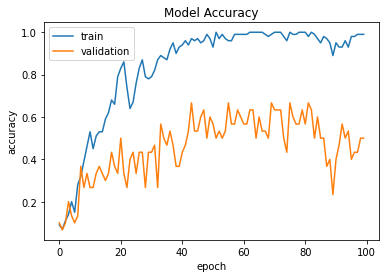

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

mango


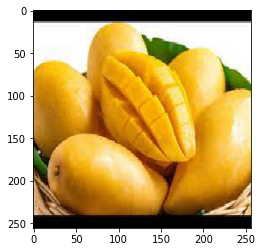

In [16]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/xoai.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

apple


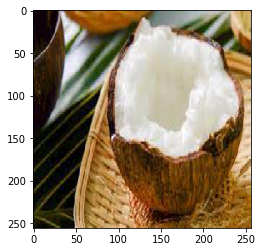

In [17]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/dua.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

lime


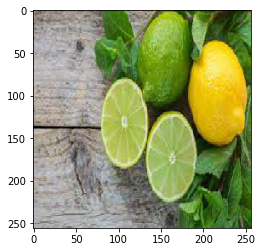

In [18]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/chanh.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

lime


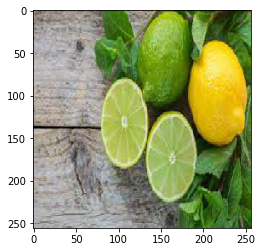

In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/chanh.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])